In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\sman0\OneDrive\Desktop\Data Science Projects\Project-3\hr.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


In [4]:
df.isna().sum() # shows we have 29 missing values in salary coulum and 11924 missing values in Age. 

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
left                         0
promotion_last_5years        0
Department                   0
salary                      29
age                      11924
dtype: int64

# Handling missing values

In [5]:
mode_salary = df['salary'].mode()[0] # filling the missing salary values with mode as its a categorical data
df['salary'].fillna(mode_salary, inplace=True)

C:\Users\sman0\AppData\Local\Temp\ipykernel_14612\2756740802.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary'].fillna(mode_salary, inplace=True)


In [6]:
df.dropna(subset=['age'], inplace=True) # dropping the coulumn age as it has many missing datas

In [7]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
age                      0
dtype: int64

In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,age
count,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000
mean,0.607669,0.715107,3.815584,200.823052,3.506494,0.146104,0.022727,27.018506
std,0.248828,0.170670,1.252636,50.066525,1.495242,0.353268,0.149057,1.429511
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,25.000000
25%,0.430000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,26.000000
50%,0.640000,0.720000,4.000000,199.000000,3.000000,0.000000,0.000000,27.000000
75%,0.810000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,28.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,29.000000


In [9]:
df.describe(include='object')

,left,Department,salary
count,3080,3080,3080
unique,3,10,3
top,0,sales,low
freq,2331,872,1501


# Making pipeline with Logistic Regression

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score

In [11]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
9,0.42,0.52,2,141,3,1,1,0,sales,medium,25.0
10,0.11,0.88,7,272,4,0,1,0,sales,medium,27.0


In [12]:
X = df.loc[:,['satisfaction_level','last_evaluation','number_project','time_spend_company','Work_accident','promotion_last_5years','Department','salary']]
y = df['left']


In [13]:

numeric_features = ['satisfaction_level','last_evaluation','number_project','time_spend_company','Work_accident','promotion_last_5years']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)


categorical_features = ['Department','salary']
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50))
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        # ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ], remainder = "passthrough"
)



model = Pipeline(
    steps=[("preprocessor", preprocessor), ("lgr", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

F:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
accuracy = model.score(X_test,y_test)
accuracy

0.797077922077922

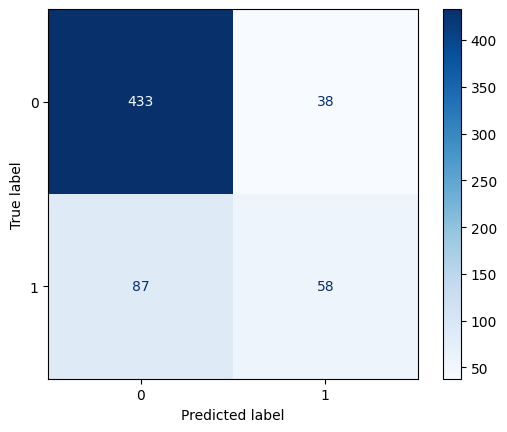

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test,y_test,cmap ="Blues")

In [16]:
precision_score(y_true=y_test.astype(int), y_pred=y_pred.astype(int))

0.6041666666666666

In [17]:
recall_score(y_true=y_test.astype(int), y_pred=y_pred.astype(int))

0.4

In [18]:
f1_score(y_true=y_test.astype(int), y_pred=y_pred.astype(int))

0.48132780082987553

# Making pipeline uwing SVM

In [19]:
from sklearn.svm import SVC

In [20]:
numeric_features = ['satisfaction_level','last_evaluation','number_project','time_spend_company','Work_accident','promotion_last_5years']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)


categorical_features = ['Department','salary']
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50))
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        # ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ], remainder = "passthrough"
)



model = Pipeline(
    steps=[("preprocessor", preprocessor), ("svm", SVC())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
print("model score: %.3f" % model.score(X_test, y_test))

model score: 0.896


In [22]:
precision_score(y_true=y_test.astype(int), y_pred=y_pred.astype(int))

0.7612903225806451

In [23]:
recall_score(y_true=y_test.astype(int), y_pred=y_pred.astype(int))

0.8137931034482758

In [24]:
f1_score(y_true=y_test.astype(int), y_pred=y_pred.astype(int))

0.7866666666666666

* In logistice regression we had 48% f1-score on scaled data However in svm we achieve 78% accuray on scaling in the same data. Therefore for this dataset svm is a better algorithm.